In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1910,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,NaN,NaN,NaN
4462,ham,He said i look pretty wif long hair wat. But i...,NaN,NaN,NaN
548,ham,Wait &lt;#&gt; min..,NaN,NaN,NaN
4405,spam,As one of our registered subscribers u can ent...,NaN,NaN,NaN
886,ham,I like to talk pa but am not able to. I dont k...,NaN,NaN,NaN


In [2]:
df.shape


(5572, 5)

In [3]:
# precess step by step
# 1. data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop the unwanted columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# rename the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [9]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [10]:
# remove duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()


np.int64(0)

In [11]:
df.shape

(5169, 2)

EDA

In [12]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

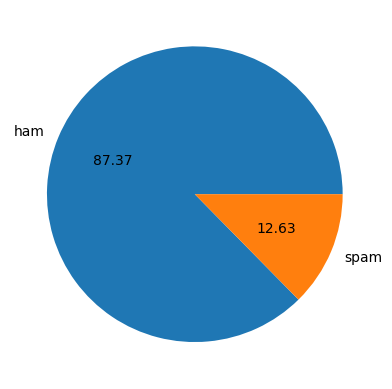

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [14]:
# decision 1: the dataset is imbalanced

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['char_count'] = df['text'].apply(len)
df.head()

,target,text,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
import sys
print(sys.version)
print(sys.executable)



3.13.2 (tags/v3.13.2:4f8bb39, Feb  4 2025, 15:23:48) [MSC v.1942 64 bit (AMD64)]
c:\Users\archi\AppData\Local\Programs\Python\Python313\python.exe


In [18]:
import nltk
print(nltk.__file__)


c:\Users\archi\AppData\Local\Programs\Python\Python313\Lib\site-packages\nltk\__init__.py


In [19]:
import nltk
print(nltk.data.find('tokenizers/punkt'))



C:\Users\archi\AppData\Roaming\nltk_data\tokenizers\punkt


In [20]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\archi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
from nltk.tokenize import word_tokenize
df['word_count'] = df['text'].apply(lambda x: nltk.word_tokenize(x)).apply(len)

In [22]:
df['sentence_count'] = df['text'].apply(lambda x: nltk.sent_tokenize(x)).apply(len)

In [23]:
df.head()

,target,text,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
# for ham messages
df[df['target'] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# spam messages
df[df['target'] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='char_count', ylabel='Count'>

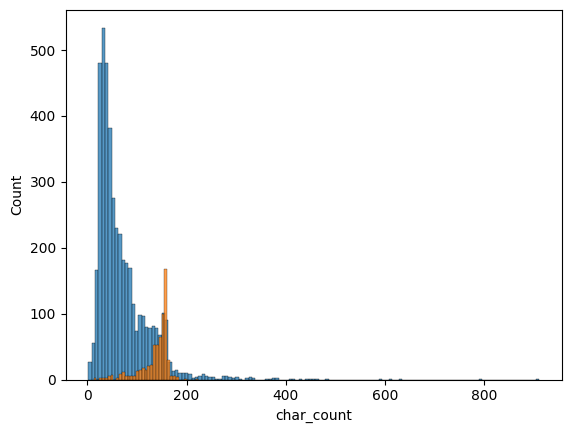

In [27]:
# plot histogram for char_count, word_count, sentence_count for ham and spam messages
import seaborn as sns

sns.histplot(df[df['target'] == 0]['char_count'])
sns.histplot(df[df['target'] == 1]['char_count'])

<Axes: xlabel='word_count', ylabel='Count'>

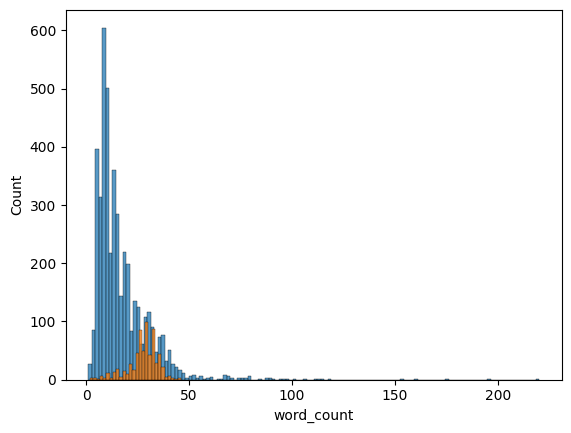

In [28]:
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'])

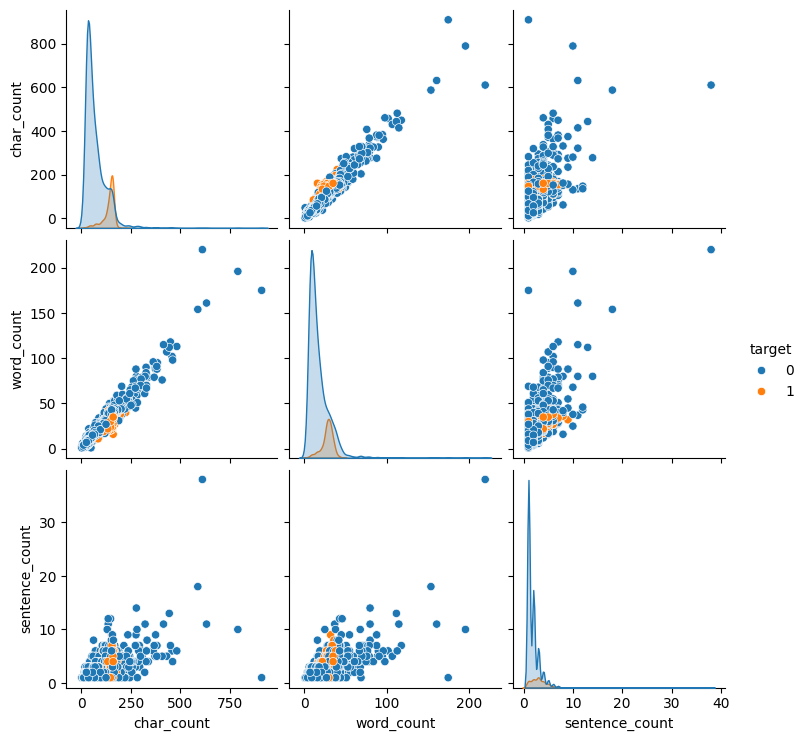

In [29]:
sns.pairplot(df, hue='target')

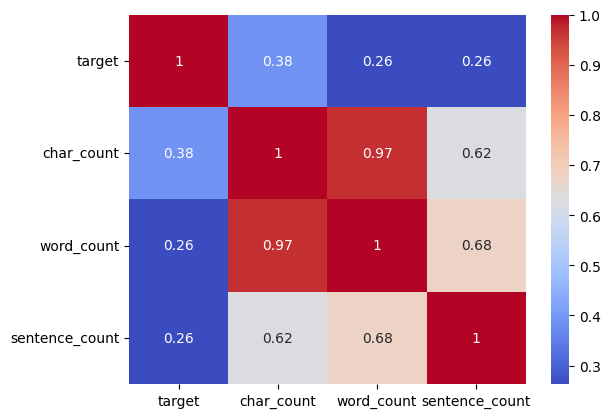

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include='number')  # select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


Data Preprocessing

In [31]:
import nltk
import string
from nltk.stem import PorterStemmer

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    for i in text:
        if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(PorterStemmer().stem(i))
    
    # Join list into string instead of returning list
    return " ".join(y)

# Apply to dataframe
df['transformed_text'] = df['text'].apply(transform_text)


In [32]:
transform_text("running is a good activity.")

'run good activ'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [34]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [35]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [36]:

df.head()

,target,text,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


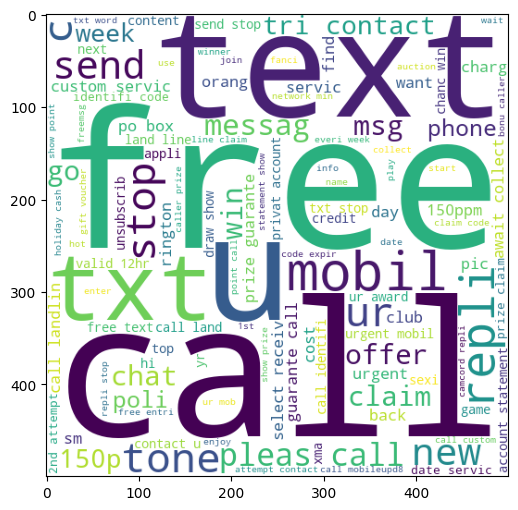

In [37]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

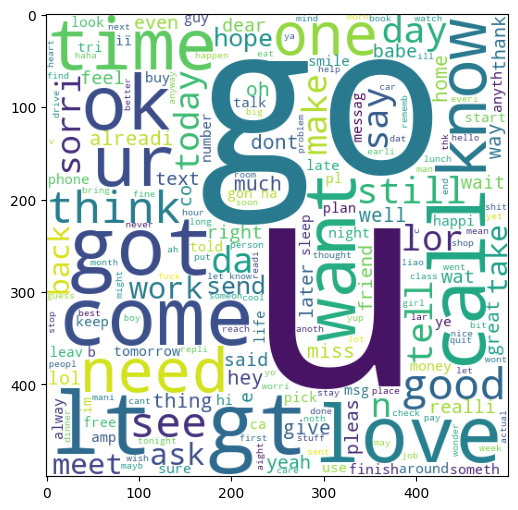

In [38]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [39]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)   

9939

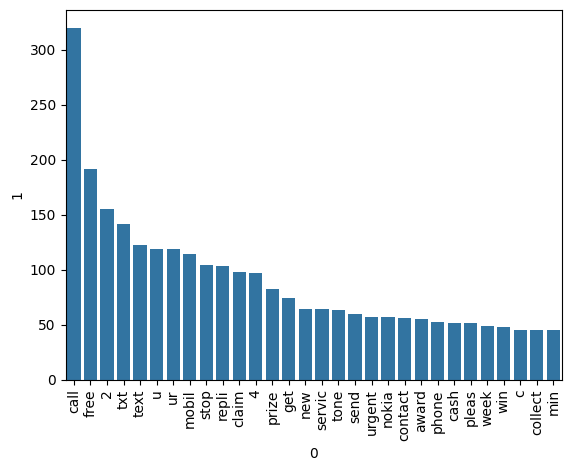

In [40]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(x=spam_df[0], y=spam_df[1])
plt.xticks(rotation=90)
plt.show()


In [41]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)   

35404

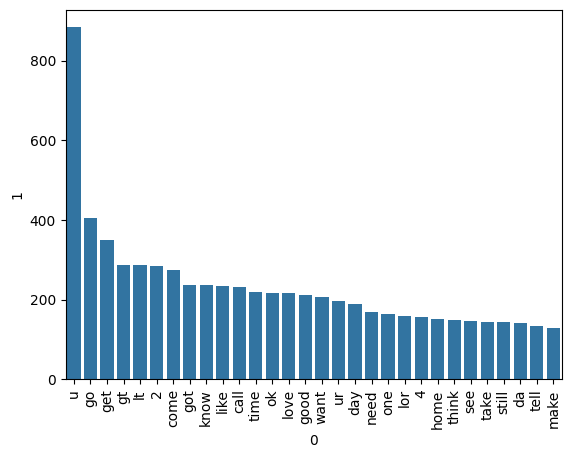

In [42]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(x=ham_df[0], y=ham_df[1])
plt.xticks(rotation=90)
plt.show()


Model Building

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [44]:
y=df['target'].values

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape
y_train.shape, y_test.shape


((4135,), (1034,))

In [47]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()



In [48]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))



0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [49]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))



0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [50]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
